In [1]:
using HierarchicalDriving
import POMDPs:initial_state
using POMDPToolbox
using Interact
using MCTS
using AutoViz
import ParticleFilters: obs_weight

In [2]:
HORIZON = 10
TIME_STEP = 0.3
lb_x = (AVG_HWY_VELOCITY - 5.0) * TIME_STEP * HORIZON
ub_x = (AVG_HWY_VELOCITY + 5.0) * TIME_STEP * HORIZON
p = LowLevelMDP(0.99,TIME_STEP, HORIZON,
                            HierarchicalDriving.RoadSegment((-100.0, 500.0),[0.0, LANE_WIDTH, 2.0 * LANE_WIDTH, 3.0 * LANE_WIDTH, 4.0 * LANE_WIDTH]),
                            CarPhysicalState((0.0, 1.0 * LANE_WIDTH/2.0, AVG_HWY_VELOCITY)),
                            (CarPhysicalState((lb_x, 3.0 * LANE_WIDTH/2.0 - 0.5, AVG_HWY_VELOCITY - 5)),
                             CarPhysicalState((ub_x, 3.0 * LANE_WIDTH/2.0 + 0.5, AVG_HWY_VELOCITY + 5))),
                            50.0, -500.0, -2.0, -5.0, -5.0, -1.0, HierarchicalDriving.getFrameList());


Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(6, nactions=1),"i",6,"6",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

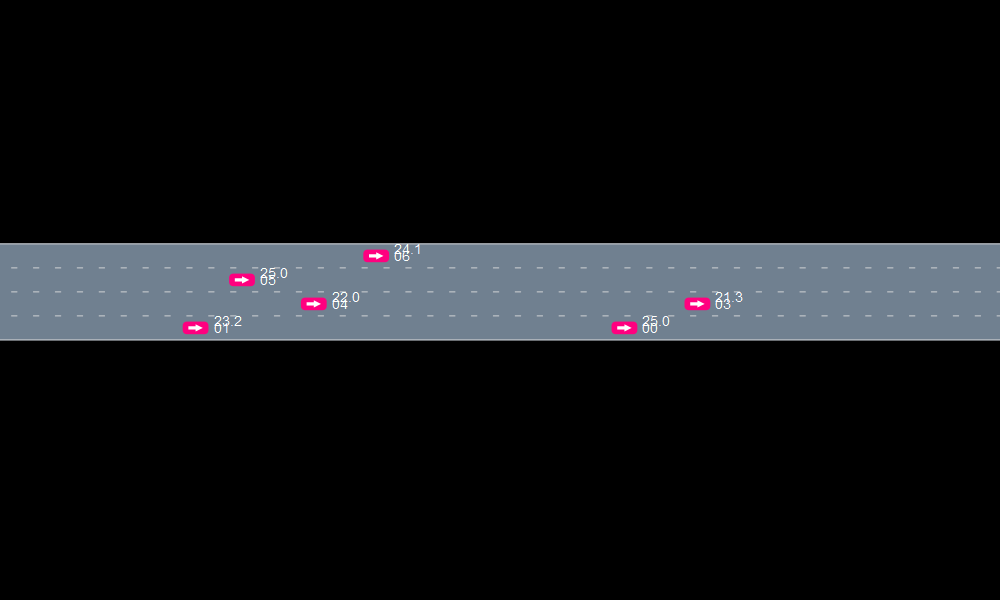

In [3]:
i = 17
#policy = RandomPolicy(p)
policy = subintentional_policy(p)
hr = HistoryRecorder(max_steps = p.HORIZON, rng = MersenneTwister(i))
hist = simulate(hr, p, policy)
@manipulate for i in 1:n_steps(hist)+1
    (p,state_hist(hist)[i],SceneOverlay[CarVelOverlay(), CarIDOverlay()])
end

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(6, nactions=1),"i",6,"6",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

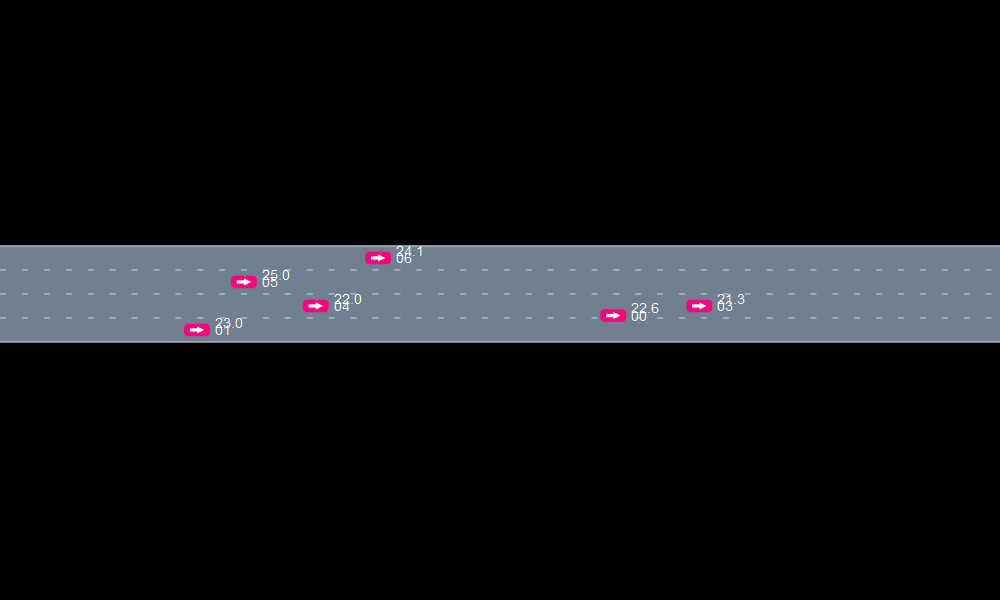

In [4]:
solver = DPWSolver(depth=p.HORIZON,
                           exploration_constant=10.0,
                           n_iterations=1_500,
                           k_action=10.0,
                           alpha_action=1/10,
                           k_state=5.0,
                           alpha_state=1/10,

                          )
policy1 = solve(solver, p)
hr1 = HistoryRecorder(max_steps = p.HORIZON, rng = MersenneTwister(i))
hist1 = simulate(hr1, p, policy1)
@manipulate for i in 1:n_steps(hist1)+1
    (p,state_hist(hist1)[i])
end

In [5]:
discounted_reward(hist)

45.67586237418204

In [6]:
discounted_reward(hist1)

34.123558845652454

In [8]:
function testing()
    n = 100
    sum = 0.0
    sum1 = 0.0
    numPositiveRnd = 0
    numPositiveMCTS = 0
    for i in 1:n
        #policy = RandomPolicy(p)
        policy = subintentional_policy(p)
        hr = HistoryRecorder(max_steps = p.HORIZON, rng = MersenneTwister(i))
        hist = simulate(hr, p, policy)

        solver = DPWSolver(depth=p.HORIZON,
                               exploration_constant=10.0,
                               n_iterations=1_500,
                               k_action=10.0,
                               alpha_action=1/10,
                               k_state=10.0,
                               alpha_state=1/10,
                               #estimate_value=RolloutEstimator(subintentional_policy(p))
                              )
        policy1 = solve(solver, p)
        hr1 = HistoryRecorder(max_steps = p.HORIZON, rng = MersenneTwister(i))
        hist1 = simulate(hr1, p, policy1)

        println(i, ",", discounted_reward(hist), ",", discounted_reward(hist1))
        sum += discounted_reward(hist)
        sum1+= discounted_reward(hist1)
        if discounted_reward(hist)>0
            numPositiveRnd += 1
        end
        if discounted_reward(hist1)>0
            numPositiveMCTS += 1
        end
    end
    println("Mean: ",sum/n,",", sum1/n)
    println("Success Rate: ", numPositiveRnd/n, ",", numPositiveMCTS/n)
end

testing (generic function with 1 method)

In [9]:
@time testing()

1,31.806143606933823,32.26009671397844
2,31.806143606933823,32.63292285314124
3,0.0,31.06421958999985
4,0.0,31.433317467771026
5,0.0,32.63292285314124
6,-6.621727775056504,31.437045729162648
7,32.306593624609825,32.26009671397844
8,31.806143606933823,32.63292285314124
9,31.806143606933823,32.26009671397844
10,31.806143606933823,30.76925287081724
11,31.806143606933823,32.63292285314124
12,31.806143606933823,29.573375746838657
13,31.806143606933823,29.942473624609825
14,31.806143606933823,32.26009671397844
15,0.0,32.26009671397844
16,0.0,32.26009671397844
17,0.0,31.437045729162648
18,31.806143606933823,31.437045729162648
19,31.806143606933823,32.26009671397844
20,0.0,27.82994280314124
21,31.806143606933823,32.63292285314124
22,-3.299735027274242,32.26009671397844
23,31.806143606933823,32.63292285314124
24,31.806143606933823,32.63292285314124
25,31.806143606933823,31.806143606933823
26,31.806143606933823,29.942473624609825
27,0.0,31.06421958999985
28,0.0,27.45711666397844
29,-11.535993188